In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def conv(x):
    if(x=='Female'):
        x=1
        return x
    else:
        x=0
        return x

In [6]:
data['Gender'] = data['Gender'].apply(conv)

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


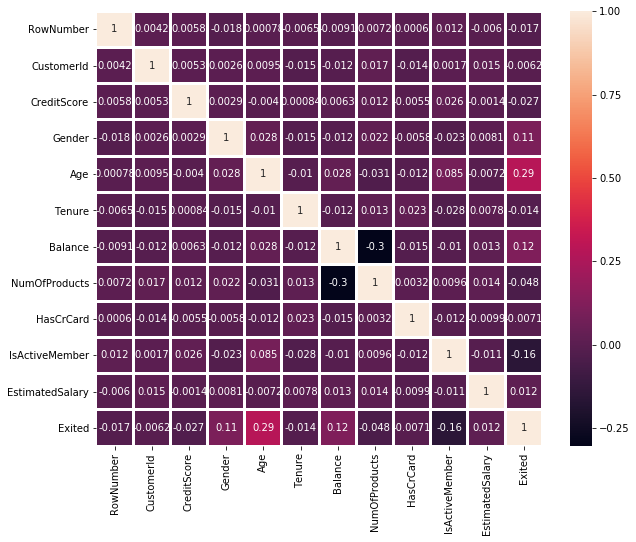

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidth=2)

In [12]:
training_data = data[['Gender' , 'Age', 'Balance']]

In [13]:
output_data = data['Exited']

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
X,x_test,Y,y_test = train_test_split(training_data, output_data, test_size=0.3, random_state= 42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X,Y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
prediction = model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
confusion_matrix(prediction, y_test)

array([[2416,  584],
       [   0,    0]], dtype=int64)

In [30]:
score = accuracy_score(prediction, y_test)
score

0.8053333333333333